In [3]:
import pyRaven as rav
import numpy as np
import matplotlib.pyplot as plt

loading specpolFlow package


In [4]:
# # Read in the param structure that was used to create the chi square data
# # and the datapacket that was used. 
# param = rav.params.read_parameters('param.json')
# datapacket = rav.data.read_packet('hd23302_norm.h5')

# # Calculate the likelihoof for the odds ratio calculations
# rav.BayesObjects.create_lnLH_odds_from_chi('H5', param, datapacket)

# # Calculate the likelihood for the parameter estimation
# # For this you will need a grid for the noise scale parameter
# param['grid']['noise_grid'] = np.arange(0.1,2.1,0.1)
# rav.BayesObjects.create_lnLH_pars_from_chi('H5', param, datapacket)

# # Calculate all of the posterior probabilities
# rav.BayesObjects.combine_obs(datapacket.nobs)

# # Make some diagnostic graphs
# rav.BayesObjects.overview_plots(datapacket.nobs)

In [5]:
# Read in the probabilities
lnP = rav.BayesObjects.read_lnP_mar('Patrick_lnpost_PARS_mar_wprior_V.h5')
# get the grid spacing (useful for integration)
lnd_beta, lnd_Bpole, lnd_incl = lnP.get_deltas(ln=True)
# marginalize the probability over beta and inclination, to get the probability just for Bpole
lnmar = rav.BayesObjects.ln_mar_check(lnP.data, axis=(0,2)) + lnd_beta + lnd_incl
mar = rav.BayesObjects.exp_check(lnmar)

# TEST DATA

In [6]:
domain = np.linspace(0, 5000, num=25)

# Unimodal
unimodal = np.array([0,0,0,0.5,1,2,4,6,7,8,8.5,8,6,4,2,1,0.5,0,0,0,0,0,0,0,0])

# Bimodal (higher peak at low Bpol)
bimodal1 = np.array([0,1,3,6,8,7,5,3,2,1,0,0.5,2,3,5,6,6,4,2,1,0.5,0,0,0,0])

# Bimodal (higher peak at low Bpol)
bimodal2 = np.array([0,0,0,0,0.5,1,2,4,6,6,5,3,2,0.5,0,1,2,3,5,7,8,6,3,1,0])


# Version 1

In [7]:
# def BpolUpperBound(Bpole_arr, mar, refinement, percent):    # where Bpole_arr is array of Bpol values, mar is array of prob density
#                                                             # values, refinement is how many times the values will be interpolated,
#                                                             # & percent is the % of the integral you want captured by the upper bound

#     n = len(lnP.Bpole_arr) * refinement                     # number of bins
#     dn = (lnP.Bpole_arr[-1] - lnP.Bpole_arr[0]) / n         # width of bin

#     Bpole = np.linspace(lnP.Bpole_arr[0], lnP.Bpole_arr[-1], num = n )  # range over which prob density will be interpolated
#     pD = np.interp(Bpole, lnP.Bpole_arr, mar)                           # interpolation of prob density

#     sorted_indices = np.argsort(pD)                   # indicies that sort prob density from lowest to highest value
#     pD_sorted = pD[sorted_indices][::-1]              # sorting prob density with reverse of sorted_indices (now highest to lowest)
#     Bpole_sorted = Bpole[sorted_indices][::-1]        # sorting Bpol values by same method

#     integral = np.sum(pD_sorted) * dn                 # integral of prob density
#     pD_sorted_cum = np.cumsum(pD_sorted) * dn         # list of cummulative sum of sorted (h to l) prob density values

#     # to find the upperbound, selecting the Bpol value which corresponds to where the cummulative sum of sorted prob density values
#     # goes above some percent of the total integral of the prob density integral (not necissarily one)
#     upperbound = Bpole_sorted[[i for i,v in enumerate(pD_sorted_cum) if v > percent * integral][0]]

#     return(upperbound)

In [8]:
# upperbound = BpolUpperBound(domain, unimodal, 20, 0.90)
# upperbound

In [9]:
# approach = []
# binnum = []

# i = 10

# while i < 1000:
#     upperbound = BpolUpperBound(lnP.Bpole_arr, mar, i, 0.90)
#     approach.append(upperbound)
#     binnum.append(len(lnP.Bpole_arr) * i)
#     i += 10

In [10]:
# plt.scatter(domain, unimodal)
# plt.show()

In [11]:
# plt.scatter(binnum, approach)
# plt.xlabel('bin num')
# plt.ylabel('Bpole upperbound')
# plt.show()

# Version 2

In [12]:
# def BpolUpperBound(Bpole_arr, mar, refinement, percents):

#     # INTERPOLATE VALUES
#     n = len(lnP.Bpole_arr) * refinement                     # number of bins
#     dn = (lnP.Bpole_arr[-1] - lnP.Bpole_arr[0]) / n         # width of bin

#     Bpole = np.linspace(lnP.Bpole_arr[0], lnP.Bpole_arr[-1], num = n )  # range over which prob density will be interpolated
#     pD = np.interp(Bpole, lnP.Bpole_arr, mar)                           # interpolation of prob density

#     # RENORNMALIZE DISTRIBUTION
#     integral = np.sum(pD) * dn                             # integral of prob density
#     norm_pD = pD / integral

#     # SORTING
#     sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
#     norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)
#     Bpole_sorted = Bpole[sorted_indices][::-1]             # sorting Bpol values by same method

#     norm_pD_sorted_cum = np.cumsum(norm_pD_sorted) * dn    # list of cummulative sum of sorted (h to l) prob density values

#     # to find the upperbound, selecting the Bpol value which corresponds to where the cummulative sum of sorted prob density values
#     # goes above some percent of the total integral of the prob density integral (not necissarily one)

#     upperbound = np.zeros(len(percents))

#     for j in range(len(percents)):
#         upperbound[j] = Bpole_sorted[[i for i,v in enumerate(norm_pD_sorted_cum) if v > percents[j]]][0]

#     return(upperbound)

In [13]:
# upperbounds = BpolUpperBound(domain, unimodal, 100000, [0.68, 0.95, 0.997])
# upperbounds

In [14]:
# plt.plot(lnP.Bpole_arr, mar, c = 'g')
# plt.axvline(x = 2540.90163607, color = 'b', linestyle = 'dashed', label = '68%')
# plt.axvline(x = 914.03656146, color = 'k', linestyle = 'solid', label = '95%')
# plt.axvline(x = 540.02160086, color = 'r', linestyle = 'dotted', label = '99.7%')

# plt.xlabel('Bpol (G)')
# plt.ylabel('Prob Distribution')

# plt.legend(loc = 'upper right')

# plt.show()

# Version 3

In [15]:
# Bpole_arr = domain
# mar = unimodal
# refinement = 100000
# percents = [0.68, 0.95, 0.997]

# # INTERPOLATE VALUES
# n = len(lnP.Bpole_arr) * refinement                     # number of bins
# dn = (lnP.Bpole_arr[-1] - lnP.Bpole_arr[0]) / n         # width of bin

# Bpole = np.linspace(lnP.Bpole_arr[0], lnP.Bpole_arr[-1], num = n )  # range over which prob density will be interpolated
# pD = np.interp(Bpole, lnP.Bpole_arr, mar)                           # interpolation of prob density

# # RENORNMALIZE DISTRIBUTION
# integral = np.sum(pD) * dn                             # integral of prob density
# norm_pD = pD / integral

# # SORTING
# sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
# norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)
# Bpole_sorted = Bpole[sorted_indices][::-1]             # sorting Bpol values by same method

# norm_pD_sorted_cum = np.cumsum(norm_pD_sorted) * dn    # list of cummulative sum of sorted (h to l) prob density values

# # to find the upperbound, selecting the Bpol value which corresponds to where the cummulative sum of sorted prob density values
# # goes above some percent of the total integral of the prob density integral (not necissarily one)

# upperbound = np.zeros(len(percents))

# for j in range(len(percents)):
#     upperbound[j] = Bpole_sorted[np.argwhere(norm_pD_sorted_cum >= percents[j])[0]]

# upperbound

# Version 4

In [16]:
# Bpole_arr = domain
# mar = bimodal1
# refinement = 100000
# percents = [0.68, 0.95, 0.997]

# all_bounds = []

# # INTERPOLATE VALUES
# n = len(Bpole_arr) * refinement                 # number of bins
# dn = (Bpole_arr[-1] - Bpole_arr[0]) / n         # width of bin
# Bpole = np.linspace(Bpole_arr[0], Bpole_arr[-1], num = n )      # range over which prob density will be interpolated
# pD = np.interp(Bpole, Bpole_arr, mar)                           # interpolation of prob density

# # RENORNMALIZE DISTRIBUTION
# integral = np.sum(pD) * dn   # integral of prob density
# norm_pD = pD / integral      # to normalize integral, divide prob density values by integral

# # SORTING
# sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
# norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)

# cumsort = np.cumsum(norm_pD_sorted)                    # cumulative sum of normalized sorted prob densities

# i = 0
# for i in range(len(percents)):
#     indices = np.argmax(cumsort > (percents[i]*cumsort[-1]))   # indices where cumsort goes over the percent
#     bound = norm_pD_sorted[indices]                       # prob density values above which, the percent of data lays

#     boolarr = norm_pD >= bound  # array that gives True within bounds, Falso outside of bounds
#     transitions = np.logical_xor(boolarr, np.roll(boolarr,-1))      # transitions are where the boolarr and the boolarr shifted by one 
#     flips = np.nonzero(transitions)                                 # do not agree; this line gives the indicies of the Bpole bounds

#     j = 0
#     bounds = np.zeros(len(flips[0]))
#     for j in range(len(flips[0])):
#         bounds[j] = Bpole[flips[0][j]]
#     all_bounds.append(bounds)

# all_bounds

In [17]:
# plt.plot(Bpole_arr, mar, c = "k")

# plt.axvline(485.66819427, color = 'b', label = '68%')
# plt.axvline(1354.83054193, color = 'b')
# plt.axvline(2811.83512473, color = 'b')
# plt.axvline(3542.32941693, color = 'b')

# plt.axvline(231.96609279, color = 'r', label = '95%')
# plt.axvline(1827.73073109, color = 'r')
# plt.axvline(2392.62295705, color = 'r')
# plt.axvline(3911.06356443, color = 'r')

# plt.axvline(53.52002141, color = 'g', label = '99.7%')
# plt.axvline(2029.81081192, color = 'g')
# plt.axvline(2190.37687615, color = 'g')
# plt.axvline(4267.95570718, color = 'g')

# plt.show()

# Version 5

In [18]:
# def upperbound(Bpole_arr, mar, refinement, percents):

#     all_bounds = []

#     # INTERPOLATE VALUES
#     n = len(Bpole_arr) * refinement                 # number of bins
#     dn = (Bpole_arr[-1] - Bpole_arr[0]) / n         # width of bin
#     Bpole = np.linspace(Bpole_arr[0], Bpole_arr[-1], num = n )      # range over which prob density will be interpolated
#     pD = np.interp(Bpole, Bpole_arr, mar)                           # interpolation of prob density

#     # RENORNMALIZE DISTRIBUTION
#     integral = np.sum(pD) * dn   # integral of prob density
#     norm_pD = pD / integral      # to normalize integral, divide prob density values by integral

#     # SORTING
#     sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
#     norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)

#     cumsort = np.cumsum(norm_pD_sorted)                    # cumulative sum of normalized sorted prob densities

#     i = 0
#     for i in range(len(percents)):
#         indices = np.argmax(cumsort > (percents[i]*cumsort[-1]))   # indices where cumsort goes over the percent
#         bound = norm_pD_sorted[indices]                            # prob density values above which, the percent of data lays

#         boolarr = norm_pD >= bound                  # array that gives True within bounds, Falso outside of bounds
#         transitions = np.logical_xor(boolarr, np.roll(boolarr,-1))      # transitions are where the boolarr and the boolarr shifted by one 
#         flips = np.nonzero(transitions)                                 # do not agree; this line gives the indicies of the Bpole bounds

#         j = 0
#         bounds = np.zeros(len(flips[0]))
#         for j in range(len(flips[0])):
#             bounds[j] = Bpole[flips[0][j]]
#         all_bounds.append(bounds)

#     return all_bounds

In [19]:
# Bpole_arr = domain
# mar = unimodal
# refinement = 100000
# percents = [0.68, 0.95, 0.997]

# upperbounds = upperbound(Bpole_arr, mar, refinement, percents)

In [20]:
# color = ['b','r','g']

# plt.plot(Bpole_arr, mar, c = "k")

# for i in range(len(upperbounds)):
#     for j in range(len(upperbounds[i])):
#         plt.axvline(upperbounds[i][j], color = color[i], label = percents[i])

# plt.legend(loc = 'upper right')
# plt.xlabel("Bpole (G)")
# plt.ylabel("Probability Distribution")

# plt.show()

# Version 6

In [21]:
# def interpolate_normalize(Bpole_arr, mar, refinement):
#     # INTERPOLATE VALUES
#     n = len(Bpole_arr) * refinement                 # number of bins
#     dn = (Bpole_arr[-1] - Bpole_arr[0]) / n         # width of bin
#     Bpole = np.linspace(Bpole_arr[0], Bpole_arr[-1], num = n )      # range over which prob density will be interpolated
#     pD = np.interp(Bpole, Bpole_arr, mar)                           # interpolation of prob density

#     # RENORNMALIZE DISTRIBUTION
#     integral = np.sum(pD) * dn   # integral of prob density
#     norm_pD = pD / integral      # to normalize integral, divide prob density values by integral

#     return(norm_pD, Bpole)



# def upperbound(norm_pD, Bpole, percents):

#     norm_pD = np.pad(norm_pD, (0,1), 'constant', constant_values=0)
#     Bpole = np.pad(Bpole, (0,1), 'constant', constant_values=0)

#     all_bounds = []

#     # SORTING
#     sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
#     norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)

#     cumsort = np.cumsum(norm_pD_sorted)                    # cumulative sum of normalized sorted prob densities

#     i = 0
#     for i in range(len(percents)):
#         indices = np.argmax(cumsort > (percents[i]*cumsort[-1]))   # indices where cumsort goes over the percent
#         bound = norm_pD_sorted[indices]                            # prob density values above which, the percent of data lays

#         boolarr = norm_pD >= bound                  # array that gives True within bounds, Falso outside of bounds
#         transitions = np.logical_xor(boolarr, np.roll(boolarr,-1))      # transitions are where the boolarr and the boolarr shifted by one 
#         flips = np.nonzero(transitions)                                 # do not agree; this line gives the indicies of the Bpole bounds

#         j = 0
#         bounds = np.zeros(len(flips[0]))
#         for j in range(len(flips[0])):
#             bounds[j] = Bpole[flips[0][j]]
#         all_bounds.append(bounds)

#     return all_bounds

In [22]:
# Bpole_arr = domain
# mar = bimodal2

# percents = [0.68, 0.95, 0.997]
# refinement = 200
# norm_pd, Bpole = interpolate_normalize(lnP.Bpole_arr, mar, refinement)
# upperbounds = upperbound(norm_pd, Bpole, percents)
# upperbounds


In [23]:
# Bpole_arr = lnP.Bpole_arr
# mar = mar
# percents = [0.68, 0.95, 0.997]


# refinements = np.arange(1, 200, 1)

# both_bounds = []

# for k in range(len(refinements)):
#     norm_pd, Bpole = interpolate_normalize(Bpole_arr, mar, refinements[k])
#     upperbounds = upperbound(norm_pd, Bpole, percents)
#     both_bounds.append(upperbounds)

# all_bounds = np.array(both_bounds)

# avg_diff = np.zeros(all_bounds.shape[0]-1)

# for j in range(all_bounds.shape[0]-1):
#     diff = (all_bounds[j][0] - all_bounds[j+1][0])
#     avg_diff[j] = np.mean(diff)

In [24]:
# plt.plot(refinements[:-1], avg_diff)
# plt.xlabel("Interpolation Factor")
# plt.ylabel("avg. diff (G)")
# plt.show()

In [25]:
# color = ['b','r','g']

# plt.plot(Bpole_arr, mar, c = "k")

# for i in range(len(upperbounds)):
#     for j in range(len(upperbounds[i])):
#         plt.axvline(upperbounds[i][j], color = color[i], label = percents[i])

# # plt.legend(loc = 'upper right')
# plt.xlabel("Bpole (G)")
# plt.ylabel("Probability Distribution")

# plt.show()

# Version 7

In [26]:
# def interpolate_normalize(Bpole_arr, mar, refinement):
#     # INTERPOLATE VALUES
#     n = len(Bpole_arr) * refinement                 # number of bins
#     dn = (Bpole_arr[-1] - Bpole_arr[0]) / n         # width of bin
#     Bpole = np.linspace(Bpole_arr[0], Bpole_arr[-1], num = n )      # range over which prob density will be interpolated
#     pD = np.interp(Bpole, Bpole_arr, mar)                           # interpolation of prob density

#     # RENORNMALIZE DISTRIBUTION
#     integral = np.sum(pD) * dn   # integral of prob density
#     norm_pD = pD / integral      # to normalize integral, divide prob density values by integral

#     return(norm_pD, Bpole)



# def upperbound(norm_pD, Bpole, percents):

#     norm_pD = np.pad(norm_pD, (0,1), 'constant', constant_values=0)
#     Bpole = np.pad(Bpole, (0,1), 'constant', constant_values=0)

#     all_bounds = []

#     # SORTING
#     sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
#     norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)

#     cumsort = np.cumsum(norm_pD_sorted)                    # cumulative sum of normalized sorted prob densities

#     i = 0
#     for i in range(len(percents)):
#         indices = np.argmax(cumsort > (percents[i]*cumsort[-1]))   # indices where cumsort goes over the percent
#         bound = norm_pD_sorted[indices]                            # prob density values above which, the percent of data lays

#         boolarr = norm_pD >= bound                  # array that gives True within bounds, Falso outside of bounds
#         transitions = np.logical_xor(boolarr, np.roll(boolarr,-1))      # transitions are where the boolarr and the boolarr shifted by one 
#         flips = np.nonzero(transitions)                                 # do not agree; this line gives the indicies of the Bpole bounds

#         j = 0
#         bounds = np.zeros(len(flips[0]))
#         for j in range(len(flips[0])):
#             bounds[j] = Bpole[flips[0][j]]
#         all_bounds.append(bounds)

#     return all_bounds

# def refinement(Bpole_arr, mar, percents, min_diff, refinements):

#     both_bounds = []

#     for k in range(len(refinements)):
#         norm_pd, Bpole = interpolate_normalize(Bpole_arr, mar, refinements[k])
#         upperbounds = upperbound(norm_pd, Bpole, percents)
#         both_bounds.append(upperbounds)

#     all_bounds = np.array(both_bounds)

#     avg_diff = np.zeros(all_bounds.shape[0]-1)

#     for j in range(all_bounds.shape[0]-1):
#         diff = (all_bounds[j][0] - all_bounds[j+1][0])
#         avg_diff[j] = np.mean(diff)


#     best_refinement = refinements[np.argwhere(np.absolute(avg_diff) < min_diff)[0]]

#     return best_refinement
    

In [27]:
# Bpole_arr = domain
# mar = bimodal2
# percents = [0.68, 0.95, 0.997]

# min_diff = 0.5

# refinements = np.arange(1, 200, 1)

# best_refinement = refinement(Bpole_arr, mar, percents, min_diff, refinements)

# print(best_refinement)

# Version 8

In [28]:
def interpolate_normalize(Bpole_arr, mar, refinement):
    # INTERPOLATE VALUES
    n = len(Bpole_arr) * refinement                 # number of bins
    dn = (Bpole_arr[-1] - Bpole_arr[0]) / n         # width of bin
    Bpole = np.linspace(Bpole_arr[0], Bpole_arr[-1], num = n )      # range over which prob density will be interpolated
    pD = np.interp(Bpole, Bpole_arr, mar)                           # interpolation of prob density

    # RENORNMALIZE DISTRIBUTION
    integral = np.sum(pD) * dn   # integral of prob density
    norm_pD = pD / integral      # to normalize integral, divide prob density values by integral

    return(norm_pD, Bpole)



def upperbound(norm_pD, Bpole, percents):

    norm_pD = np.pad(norm_pD, (0,1), 'constant', constant_values=0)
    Bpole = np.pad(Bpole, (0,1), 'constant', constant_values=0)

    all_bounds = []

    # SORTING
    sorted_indices = np.argsort(norm_pD)                   # indicies that sort prob density from lowest to highest value
    norm_pD_sorted = norm_pD[sorted_indices][::-1]         # sorting prob density with reverse of sorted_indices (now highest to lowest)

    cumsort = np.cumsum(norm_pD_sorted)                    # cumulative sum of normalized sorted prob densities

    i = 0
    for i in range(len(percents)):
        indices = np.argmax(cumsort > (percents[i]*cumsort[-1]))   # indices where cumsort goes over the percent
        bound = norm_pD_sorted[indices]                            # prob density values above which, the percent of data lays

        boolarr = norm_pD >= bound                  # array that gives True within bounds, Falso outside of bounds
        transitions = np.logical_xor(boolarr, np.roll(boolarr,-1))      # transitions are where the boolarr and the boolarr shifted by one 
        flips = np.nonzero(transitions)                                 # do not agree; this line gives the indicies of the Bpole bounds

        j = 0
        bounds = np.zeros(len(flips[0]))
        for j in range(len(flips[0])):
            bounds[j] = Bpole[flips[0][j]]
        all_bounds.append(bounds)

    return all_bounds



def refinement(Bpole_arr, mar, percents, min_diff, refinements):

    both_bounds = []

    for k in range(len(refinements)):
        norm_pd, Bpole = interpolate_normalize(Bpole_arr, mar, refinements[k])
        upperbounds = upperbound(norm_pd, Bpole, percents)
        both_bounds.append(upperbounds)

    all_bounds = np.array(both_bounds)

    avg_diff = np.zeros(all_bounds.shape[0]-1)

    for j in range(all_bounds.shape[0]-1):
        diff = (all_bounds[j][0] - all_bounds[j+1][0])
        avg_diff[j] = np.mean(diff)


    best_refinement = refinements[np.argwhere(np.absolute(avg_diff) < min_diff)[0]]

    return best_refinement



def figure(Bpole, norm_pd, upperbounds, percents):

    fig, ax = plt.subplots(1,1)

    ax.plot(Bpole, norm_pd, c = "k")

    linestyle = [':', '-.', '--']

    for i in range(len(upperbounds)):
        for j in range(len(upperbounds[i])):
            if j == 0:
                ax.axvline(upperbounds[i][j], color = 'k', label = percents[i], linestyle = linestyle[i])

            ax.axvline(upperbounds[i][j], color = 'k', linestyle = linestyle[i])

    upperbounds2=np.array(upperbounds).T

    if upperbounds2[0][0] > upperbounds2[1][0]:
        upperbounds = np.flip(upperbounds, axis = 1)

    for i in range(int(len(upperbounds2)/2)):
        for j in range(len(upperbounds2[i])): 
            ax.fill_between(Bpole, norm_pd, 0, where = (Bpole >= upperbounds[j][2*i]) & (Bpole <= upperbounds[j][2*i+1]), color = 'indigo', alpha = 0.5, zorder = 10)

    ax.legend(loc = 'upper right')
    ax.set_xlabel("Bpole (G)")
    ax.set_ylabel("Probability Distribution")

    plt.show()

    return fig

In [29]:
# Bpole_arr = domain
# mar = bimodal2
# percents = [0.68, 0.95, 0.997]

# min_diff = 0.5

# refinements = np.arange(1, 200, 1)

# best_refinement = refinement(Bpole_arr, mar, percents, min_diff, refinements)

# print(best_refinement)

In [30]:
# Read in the probabilities
lnP = rav.BayesObjects.read_lnP_mar('Patrick_lnpost_PARS_mar_wprior_V.h5')
# get the grid spacing (useful for integration)
lnd_beta, lnd_Bpole, lnd_incl = lnP.get_deltas(ln=True)
# marginalize the probability over beta and inclination, to get the probability just for Bpole
lnmar = rav.BayesObjects.ln_mar_check(lnP.data, axis=(0,2)) + lnd_beta + lnd_incl
mar = rav.BayesObjects.exp_check(lnmar)

Bpole_arr = lnP.Bpole_arr
mar = mar

#Bpole_arr = domain
#mar = bimodal2

percents = [0.68, 0.95, 0.997]
refinement = 200
norm_pd, Bpole = interpolate_normalize(Bpole_arr, mar, refinement)
upperbounds = upperbound(norm_pd, Bpole, percents)


In [31]:
bins=np.arange(0,5100,100)
bins

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000])

In [32]:
np.sum(norm_pd)*(Bpole[1]-Bpole[0])

1.0000248762407027

In [33]:
hist=[]
for i in range(1,bins.size):
    hist.append(sum(norm_pd[np.where((Bpole<bins[i]) & (Bpole>=bins[i-1]))]*(Bpole[1]-Bpole[0])))

50

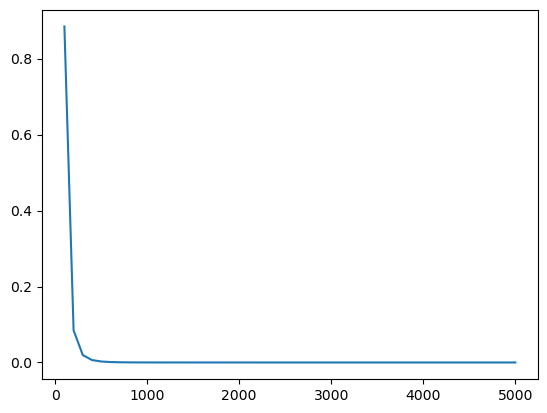

In [41]:
plt.plot(bins[1:],hist)
np.array(hist).size

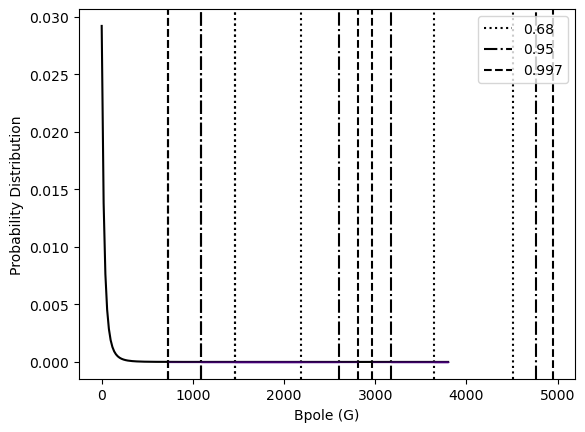

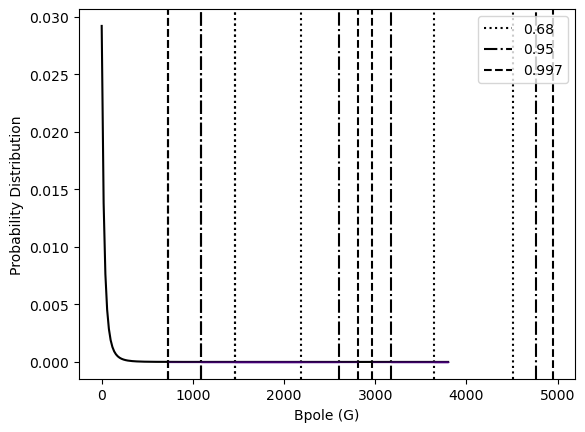

In [91]:
figure(Bpole2, norm_pd2, upperbounds, percents)